In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, HuberRegressor

%matplotlib inline

In [2]:
deu = pd.read_csv('C://duh/Thinkful/Thinkful/Exercises/DEUPROINDQISMEI.csv')
jpn = pd.read_csv('C://duh/Thinkful/Thinkful/Exercises/JPNPROINDQISMEI.csv')

In [3]:
deu.head()

,DATE,DEUPROINDQISMEI
0,1960-01-01,27.295447
1,1960-04-01,27.932635
2,1960-07-01,28.731932
3,1960-10-01,29.472757
4,1961-01-01,30.283304


In [4]:
jpn.head()

,DATE,JPNPROINDQISMEI
0,1960-01-01,12.507173
1,1960-04-01,13.011947
2,1960-07-01,13.572807
3,1960-10-01,14.217796
4,1961-01-01,15.002999


In [5]:
df = deu.set_index('DATE').join(jpn.set_index('DATE'))

In [6]:
df.head()

,DEUPROINDQISMEI,JPNPROINDQISMEI
DATE,,
1960-01-01,27.295447,12.507173
1960-04-01,27.932635,13.011947
1960-07-01,28.731932,13.572807
1960-10-01,29.472757,14.217796
1961-01-01,30.283304,15.002999


In [7]:
df['deu_chng'] = df.DEUPROINDQISMEI.diff() * 4

In [8]:
df.head()

,DEUPROINDQISMEI,JPNPROINDQISMEI,deu_chng
DATE,,,
1960-01-01,27.295447,12.507173,NaN
1960-04-01,27.932635,13.011947,2.548752
1960-07-01,28.731932,13.572807,3.197188
1960-10-01,29.472757,14.217796,2.963301
1961-01-01,30.283304,15.002999,3.242185


In [9]:
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(236, 3)
(235, 3)


In [11]:
df.head()

,DEUPROINDQISMEI,JPNPROINDQISMEI,deu_chng
DATE,,,
1960-04-01,27.932635,13.011947,2.548752
1960-07-01,28.731932,13.572807,3.197188
1960-10-01,29.472757,14.217796,2.963301
1961-01-01,30.283304,15.002999,3.242185
1961-04-01,30.095526,15.591902,-0.751112


In [12]:
lm = LinearRegression()

X = pd.DataFrame(df.deu_chng)
y = list(df.JPNPROINDQISMEI)

lm.fit(X, y)

print('coefficients: ' + str(lm.coef_))
print('intercept: ' + str(lm.intercept_))
print('score: ' + str(lm.score(X,y)))

coefficients: [0.07694424]
intercept: 78.44699733680183
score: 0.00021308804717434793


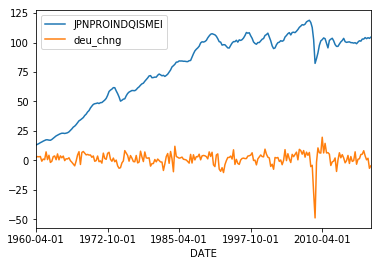

In [13]:
df[['JPNPROINDQISMEI', 'deu_chng']].plot()
plt.show()

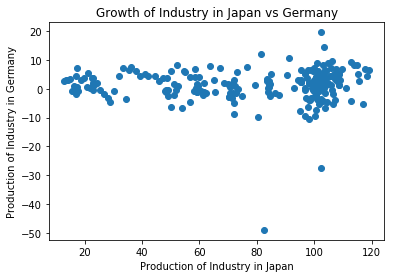

In [15]:
plt.scatter(x=df.JPNPROINDQISMEI, y=df.deu_chng)
plt.title('Growth of Industry in Japan vs Germany')
plt.xlabel('Production of Industry in Japan')
plt.ylabel('Production of Industry in Germany')
plt.show()

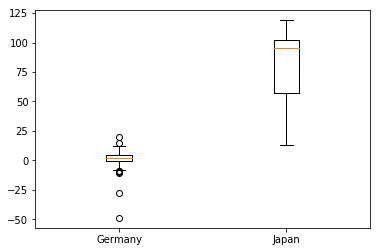

In [16]:
plt.boxplot([df.deu_chng, df.JPNPROINDQISMEI])
plt.xticks([1,2], ['Germany', 'Japan'])
plt.show()

In [17]:
hr = HuberRegressor()

hr.fit(X,y)
print('coefficients: ' + str(hr.coef_))
print('intercept: ' + str(hr.intercept_))
print('score: ' + str(hr.score(X,y)))

coefficients: [0.18035084]
intercept: 83.57615993685683
score: -0.030670448895101954


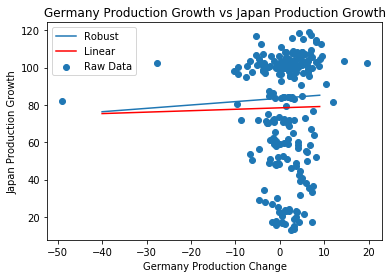

In [24]:
robust = [hr.coef_[0] * i + hr.intercept_ for i in range(-40, 10)]
linear = [lm.coef_[0] * i + lm.intercept_ for i in range(-40, 10)]

plt.scatter(x = df.deu_chng, y = df.JPNPROINDQISMEI, label='Raw Data')
plt.plot(range(-40,10), robust, label='Robust')
plt.plot(range(-40,10), linear, 'r', label='Linear')
plt.legend()
plt.title('Germany Production Growth vs Japan Production Growth')
plt.xlabel('Germany Production Change')
plt.ylabel('Japan Production Growth')
plt.show()

## It seems that as Germany's production grows, so too does Japan's.